In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [131]:
data = pd.read_excel('Online_Retail.xlsx')
data.head(n=5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [133]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [134]:
len(data['CustomerID'].unique())

4373

In [135]:
filtered_data = data[['Country','CustomerID']].drop_duplicates()

<AxesSubplot:>

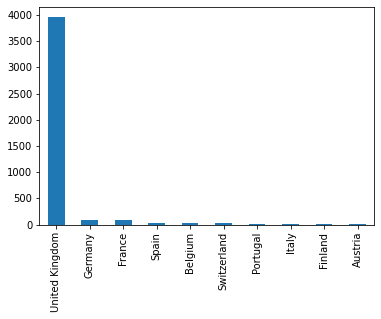

In [136]:
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [137]:
uk_data = data[data.Country=='United Kingdom']

In [138]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


In [139]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [140]:
#Filter quantity greater than zero
uk_data = uk_data[(uk_data.Quantity>0)]

In [141]:
uk_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [142]:
#Filter required columns for RFM Analysis
uk_data = uk_data[['CustomerID','InvoiceNo','InvoiceDate','Quantity','UnitPrice']]
uk_data.head(n=5)

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice
0,17850.0,536365,2010-12-01 08:26:00,6,2.55
1,17850.0,536365,2010-12-01 08:26:00,6,3.39
2,17850.0,536365,2010-12-01 08:26:00,8,2.75
3,17850.0,536365,2010-12-01 08:26:00,6,3.39
4,17850.0,536365,2010-12-01 08:26:00,6,3.39


In [143]:
uk_data['TotalPrice'] = uk_data['Quantity']*uk_data['UnitPrice']

In [144]:
uk_data.head(n=5)

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalPrice
0,17850.0,536365,2010-12-01 08:26:00,6,2.55,15.30
1,17850.0,536365,2010-12-01 08:26:00,6,3.39,20.34
2,17850.0,536365,2010-12-01 08:26:00,8,2.75,22.00
3,17850.0,536365,2010-12-01 08:26:00,6,3.39,20.34
4,17850.0,536365,2010-12-01 08:26:00,6,3.39,20.34


In [145]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [146]:
PRESENT = dt.datetime(2011,12,10)

In [147]:
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [148]:
uk_data.tail(n=5000)

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalPrice
536513,NaN,581219,2011-12-08 09:28:00,16,0.83,13.28
536514,NaN,581219,2011-12-08 09:28:00,12,3.29,39.48
536515,NaN,581219,2011-12-08 09:28:00,2,1.63,3.26
536516,NaN,581219,2011-12-08 09:28:00,1,2.46,2.46
536517,NaN,581219,2011-12-08 09:28:00,2,3.29,6.58
...,...,...,...,...,...,...
541889,15804.0,581585,2011-12-09 12:31:00,12,1.95,23.40
541890,13113.0,581586,2011-12-09 12:49:00,8,2.95,23.60
541891,13113.0,581586,2011-12-09 12:49:00,24,1.25,30.00
541892,13113.0,581586,2011-12-09 12:49:00,24,8.95,214.80


In [149]:
uk_data.head(n=5)

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalPrice
0,17850.0,536365,2010-12-01 08:26:00,6,2.55,15.30
1,17850.0,536365,2010-12-01 08:26:00,6,3.39,20.34
2,17850.0,536365,2010-12-01 08:26:00,8,2.75,22.00
3,17850.0,536365,2010-12-01 08:26:00,6,3.39,20.34
4,17850.0,536365,2010-12-01 08:26:00,6,3.39,20.34


In [150]:
rfm = uk_data.groupby('CustomerID').agg({'InvoiceDate':lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo':lambda num: len(num),
                                        'TotalPrice':lambda price :price.sum()})

In [151]:
rfm.head(n=5)

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [152]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalPrice'], dtype='object')

In [153]:
rfm.columns = ['recency','frequency','monetary']

In [154]:
rfm['recency'] = rfm['recency'].astype(int)

In [155]:
rfm.head(n=5)

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [156]:
#Customers with the lowest receny,highest frwquency and monetary are considered as top customers
#qcut is quantile-based dicretization function.qcut bins the data based on sample quantiles.For example 1000 values for 4 quantiles
#would produce a categorical object indicating quantile membership of each customer
rfm['r_quartile'] = pd.qcut(rfm['recency'],4,[1,2,3,4])
rfm['f_quartile'] = pd.qcut(rfm['frequency'],4,[4,3,2,1])
rfm['m_quartile'] = pd.qcut(rfm['monetary'],4,[4,3,2,1])

In [157]:
rfm.head(n=5)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [158]:
print(rfm['r_quartile'].value_counts())
print(rfm['f_quartile'].value_counts())
print(rfm['m_quartile'].value_counts())

1    1004
4     979
3     969
2     969
Name: r_quartile, dtype: int64
4    1030
1     980
2     962
3     949
Name: f_quartile, dtype: int64
4    981
1    980
2    980
3    980
Name: m_quartile, dtype: int64


In [159]:
rfm['rfm_score'] = rfm.r_quartile.astype(str) + rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)

In [160]:
rfm.head(n=5)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122
